# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Get the dataset

In [2]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

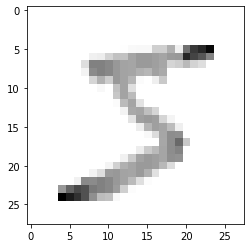

In [4]:
# Pre processing 
x_train =tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

## Visualize the dataset
Print some images with labels.

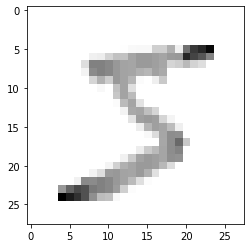

In [5]:
import matplotlib.pyplot as plt

# Your code
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [6]:
import numpy as np

# Your code
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)


## Model

In [12]:
# model building

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
#1st layer
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape =x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#2nd Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#3rd Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))
          
model.add(Dense(10))
model.add(Activation("softmax"))


In [13]:
# Compile the model (add optimizers and metrics)

# Fit the model on the training data (specify validation_split, read about validation if new to you)
model.compile(loss="sparse_categorical_crossentropy",optimizer ="adam", metrics=['accuracy'])
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)



Epoch 1/5
1313/1313 [==============================] - 66s 49ms/step - loss: 0.3331 - accuracy: 0.8946 - val_loss: 0.1358 - val_accuracy: 0.9579
Epoch 2/5
1313/1313 [==============================] - 65s 50ms/step - loss: 0.1065 - accuracy: 0.9684 - val_loss: 0.1023 - val_accuracy: 0.9693
Epoch 3/5
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0770 - accuracy: 0.9768 - val_loss: 0.0714 - val_accuracy: 0.9781
Epoch 4/5
1313/1313 [==============================] - 64s 49ms/step - loss: 0.0602 - accuracy: 0.9811 - val_loss: 0.0734 - val_accuracy: 0.9782
Epoch 5/5
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0651 - val_accuracy: 0.9812


## Predict some images
Print the image along with its label (true value) and predicted value.

In [14]:
# Your code
predictions=model.predict([x_testr])

313/313 [==============================] - 4s 13ms/step


In [23]:
for i in range(25):
    print(np.argmax(predictions[i] ))

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4


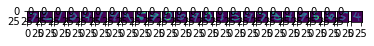

In [32]:
f=  plt.figure()
for i in range(25):
    f.add_subplot(1,25,i+1)
    plt.imshow(x_test[i])


plt.show(block=True)
